## Hoping that Data Augmentation will help in generalization with the Validation set
### Using Strategy 1: Create a twice as big aumented training set where each image will have another image with a random selection transforms
- Only use transforms that do not change the size or the number of channels
- Used Transforms: 
    1. Random Color Jitter (Hue, Saturation, Contrast, Brightness)
    2. Horizontal Flip
    3. Vertical Flip
    4. Histogram Equalization
    5. Auto Contrast
    6. Adjust Shaprness x 2
    7. Solarize
    8. Posterize (reduce bit depth to 2 bit)
    9. Invert
    10. Affine Transformation
    11. Random rotation (0 to 180)
    12. Random Perspective shift
    13. Gaussian Blur
- Discarded Transforms:
    1. 

In [1]:
import numpy as np
import torch
import torchvision.transforms as T
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
train = np.load('./train_honda.npz')
for i in train: 
    print(i)
    
train_images = np.moveaxis(train['train_images'],1,-1)
print(train_images.shape)

labels = train['train_targets'] # These are turning angles

print(labels.shape)
print(labels[110:150])

train_images
train_targets
(100000, 66, 200, 3)
(100000,)
[-0.07968127 -0.07304117 -0.07304117 -0.07304117 -0.15272244 -0.2124834
 -0.2124834  -0.17928287 -0.09296149 -0.06640106 -0.07304117 -0.07968127
 -0.11952191 -0.16600266 -0.16600266 -0.16600266 -0.05976096  0.23240372
  0.25232404  0.16600266 -0.07304117 -0.2124834  -0.21912351 -0.2124834
 -0.22576361 -0.25232404 -0.25896414 -0.26560425 -0.26560425 -0.25896414
 -0.22576361 -0.22576361 -0.19920319 -0.13944223 -0.13280212 -0.07968127
 -0.04648074 -0.01992032 -0.01992032 -0.02656042]


## Study of labels
Steering angle = Turning angle * 15
What type of normalization should be applied? 
The angles have both positive and negative values

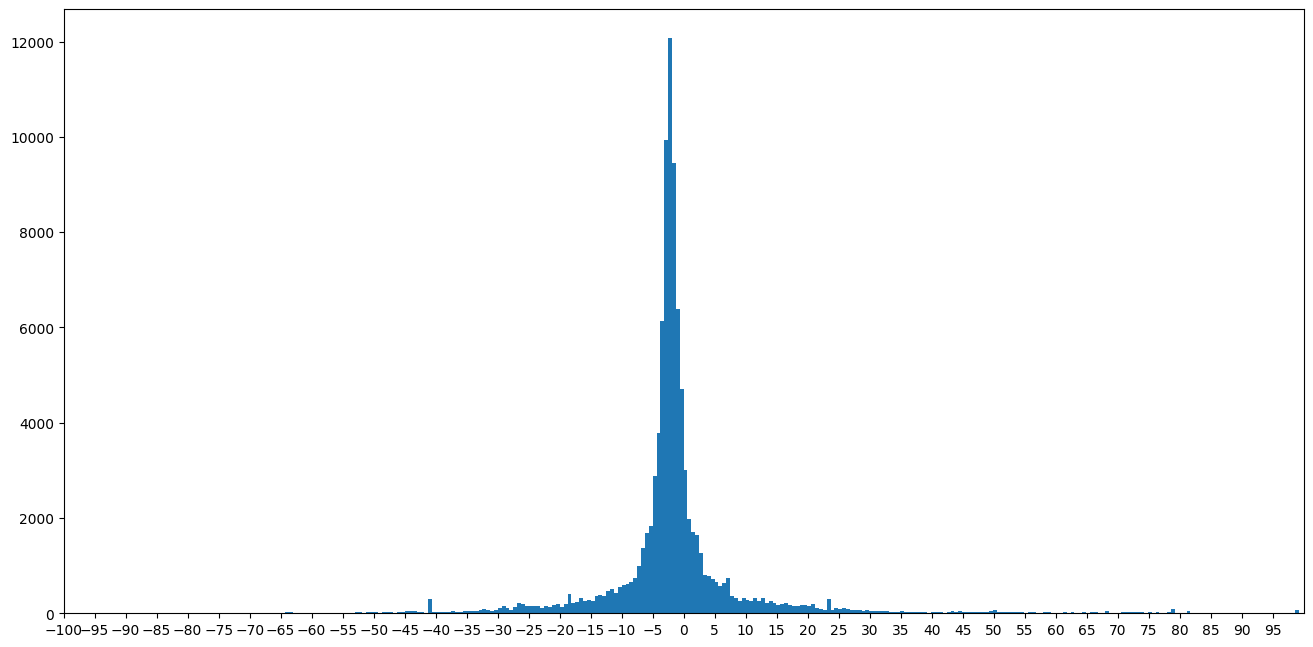

In [3]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(16,8), dpi=100)
ax.set_xlim([-100,100])
ax.hist(15*labels, density=False, bins=1500);
ax.set_xticks(np.arange(-100,100,5));

In [4]:
print(np.max(labels))
# So, divide everything by 532 should help to get in range -1,1
# After that h

print(np.min(labels))

31.201859229747672
-31.201859229747672


## Multiply all labels by 15 in the loader
print(labels[110:150])
labels = 15.0*labels # these are steering angles

(66, 200, 3)


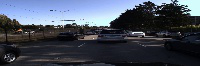

In [5]:
orig_img = Image.fromarray(np.uint8(train_images[10])).convert('RGB') 
print(np.asarray(orig_img).shape)
orig_img

(66, 200, 3)


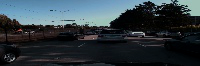

In [6]:
# Randomly change the brightness, contrast, saturation and hue of an image
# float or tuple of python:float (min, max)) – 
# How much to jitter brightness. brightness_factor is chosen uniformly from [max(0, 1 - brightness), 1 + brightness] 
# or the given [min, max]. Should be non negative numbers.

# Uniformly random in the range
jitter = T.ColorJitter(brightness=.5, hue=.3, contrast=0.2, saturation=0.2)
jitted_img = jitter(orig_img) 
print(np.asarray(jitted_img).shape)
jitted_img

(66, 200, 3)


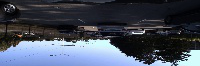

In [7]:
vflipper = T.RandomVerticalFlip(p=1.0) # If this transform is selected, do it 100% of the time
transformed_img = vflipper(orig_img)
print(np.asarray(transformed_img).shape)
transformed_img

(66, 200, 3)


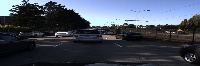

In [8]:
hflipper = T.RandomHorizontalFlip(p=1.0) # If this transform is selected, do it 100% of the time
transformed_img = hflipper(orig_img)
print(np.asarray(transformed_img).shape)
transformed_img

(66, 200, 3)


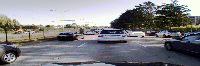

In [9]:
equalizer = T.RandomEqualize(p=1.0)
transformed_img = equalizer(orig_img)
print(np.asarray(transformed_img).shape)
transformed_img

(66, 200, 3)


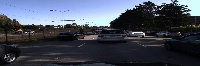

In [10]:
autocontraster = T.RandomAutocontrast(p=1.0)
transformed_img = autocontraster(orig_img)
print(np.asarray(transformed_img).shape)
transformed_img

(66, 200, 3)


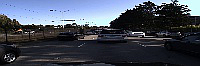

In [11]:
sharpness_adjuster = T.RandomAdjustSharpness(p=1.0,sharpness_factor=2)
transformed_img = sharpness_adjuster(orig_img)
print(np.asarray(transformed_img).shape)
transformed_img

(66, 200, 3)


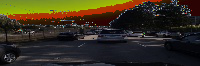

In [12]:
solarizer = T.RandomSolarize(p=1.0, threshold=192.0)
transformed_img = solarizer(orig_img)
print(np.asarray(transformed_img).shape)
transformed_img

(66, 200, 3)


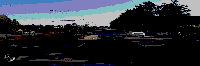

In [13]:
posterizer = T.RandomPosterize(p=1.0,bits=2)
transformed_img = posterizer(orig_img)
print(np.asarray(transformed_img).shape)
transformed_img

(66, 200, 3)


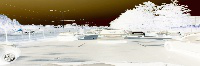

In [14]:
inverter = T.RandomInvert(p=1.0)
transformed_img = inverter(orig_img)
print(np.asarray(transformed_img).shape)
transformed_img

(66, 200, 3)


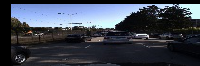

In [15]:
affine_transfomer = T.RandomAffine(degrees=(-5, 5), translate=(0.05, 0.05), scale=(0.95, 0.95))
transformed_img = affine_transfomer(orig_img)
print(np.asarray(transformed_img).shape)
transformed_img

(66, 200, 3)


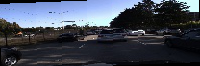

In [16]:
rotater = T.RandomRotation(degrees=(-5, 5))
transformed_img = rotater(orig_img)
print(np.asarray(transformed_img).shape)
transformed_img

(66, 200, 3)


/mnt/c/Users/iambi/Desktop/Regressor/env/lib/python3.8/site-packages/torchvision/transforms/functional.py:594: UserWarning: torch.lstsq is deprecated in favor of torch.linalg.lstsq and will be removed in a future PyTorch release.
torch.linalg.lstsq has reversed arguments and does not return the QR decomposition in the returned tuple (although it returns other information about the problem).
To get the qr decomposition consider using torch.linalg.qr.
The returned solution in torch.lstsq stored the residuals of the solution in the last m - n columns of the returned value whenever m > n. In torch.linalg.lstsq, the residuals in the field 'residuals' of the returned named tuple.
The unpacking of the solution, as in
X, _ = torch.lstsq(B, A).solution[:A.size(1)]
should be replaced with
X = torch.linalg.lstsq(A, B).solution (Triggered internally at  /pytorch/aten/src/ATen/LegacyTHFunctionsCPU.cpp:389.)
  res = torch.lstsq(b_matrix, a_matrix)[0]


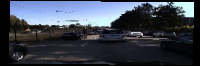

In [17]:
perspective_transformer = T.RandomPerspective(distortion_scale=0.1, p=1.0)
transformed_img = perspective_transformer(orig_img)
print(np.asarray(transformed_img).shape)
transformed_img

(66, 200, 3)


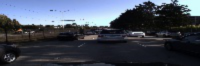

In [18]:
blurrer = T.GaussianBlur(kernel_size=(3,3), sigma=(0.05, 0.6))
transformed_img = blurrer(orig_img)
print(np.asarray(transformed_img).shape)
transformed_img

In [19]:
# Random apply with probability of jitter higher?

In [20]:
def get_random_transform(transforms_list):
    seed = np.random.randint(0, 9)
    #print("Seed = ",seed)
    return seed, transforms_list[seed]

In [21]:
#Each of this accepts PIL image
transforms_list = [
    T.ColorJitter(brightness=.5, hue=.5, contrast=0.5, saturation=0.5),
    T.RandomHorizontalFlip(p=1.0), # Shoulf change the angle to a negative
    T.ColorJitter(brightness=.6), # Extra priority to brightness
    #T.RandomEqualize(p=1.0), # Creates unnecessary artifacts
    T.RandomAutocontrast(p=1.0),
    T.RandomAdjustSharpness(p=1.0,sharpness_factor=2),
    T.RandomAffine(degrees=(-5, 5), translate=(0.05, 0.05), scale=(0.95, 0.95)),
    T.RandomRotation(degrees=(-5, 5)),
    T.RandomPerspective(distortion_scale=0.1, p=1.0),
    T.RandomPosterize(p=1.0,bits=2), # Reduce info.. fog.. lens flare
    T.GaussianBlur(kernel_size=(3,3), sigma=(0.05, 0.6))] # Believed to simulated rain drops on windscreen

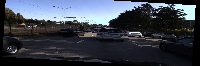

In [22]:
seed, tr = get_random_transform(transforms_list)
tr(orig_img)

In [23]:
print(train_images.shape)
print(labels.shape)

# In the for loop everything is in (66,200,3)
# To merge into the dataset they have to be converted to (3,66,200)
new_train_images = []
new_train_labels = []
for i in range(train_images.shape[0]):
    if i%10000 ==0:
        print(i)
    current_image = train_images[i]
    current_label = labels[i]
    angle = current_label*15 # Steering angle
    
    new_train_images.append(current_image)
    new_train_labels.append(current_label)
    orig_image = Image.fromarray(np.uint8(current_image)).convert('RGB')
    
    seed, tr = get_random_transform(transforms_list)
    transformed_image = tr(orig_image)
    transformed_image_numpy = np.asarray(transformed_image)

    new_train_images.append(transformed_image_numpy)
    if seed == 1:
        transformed_label = -1.0 * current_label

    else:
        transformed_label = current_label
    new_train_labels.append(transformed_label)
        
    # first augmentation
    if angle >=5.0 or angle<=-5.0:
        seed, tr = get_random_transform(transforms_list)
        transformed_image = tr(orig_image)
        transformed_image_numpy = np.asarray(transformed_image)

        new_train_images.append(transformed_image_numpy)
        if seed == 1:
            transformed_label = -1.0 * current_label

        else:
            transformed_label = current_label
        new_train_labels.append(transformed_label)

(100000, 66, 200, 3)
(100000,)
0
10000
20000
30000
40000
50000
60000
70000
80000
90000


In [24]:
new_train_images = np.asarray(new_train_images) # asarray does not copy but not sure if that applies to a list
print(new_train_images.shape)

(232737, 66, 200, 3)


In [25]:
new_train_labels = np.array(new_train_labels)
print(new_train_labels.shape)

(232737,)


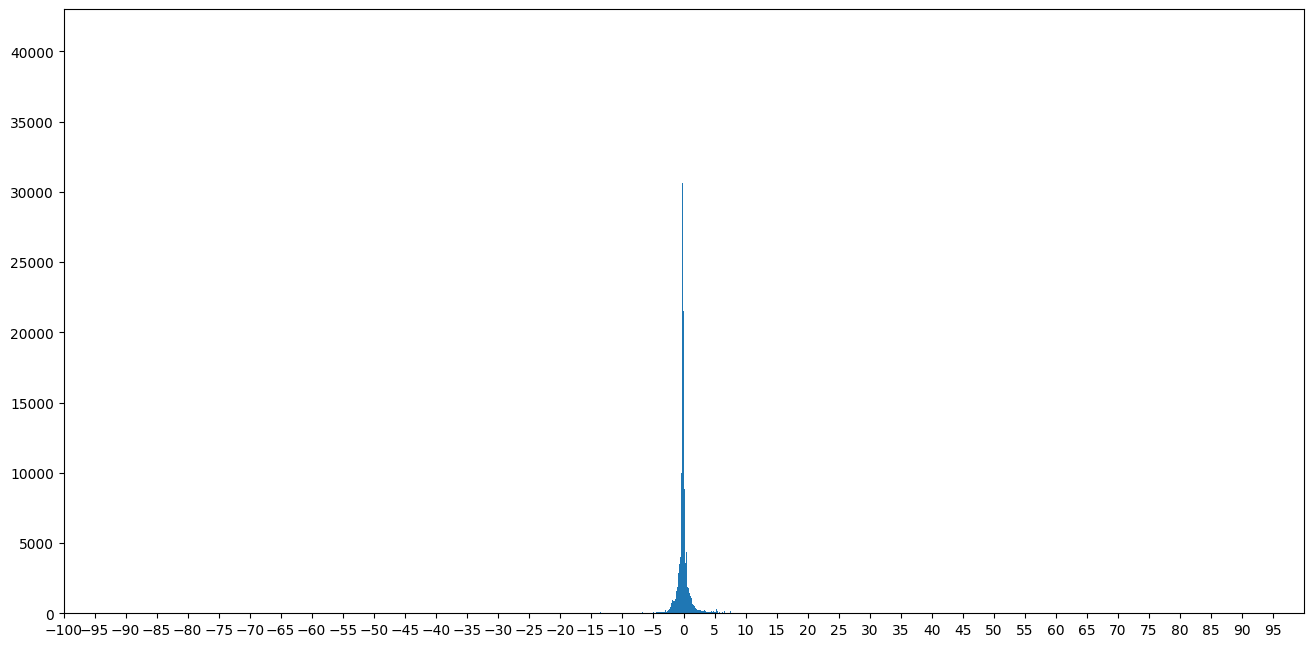

In [26]:
# That was quick

fig, ax = plt.subplots(figsize=(16,8), dpi=100)
ax.set_xlim([-100,100])
ax.hist(new_train_labels, density=False, bins=750);
ax.set_xticks(np.arange(-100,100,5));

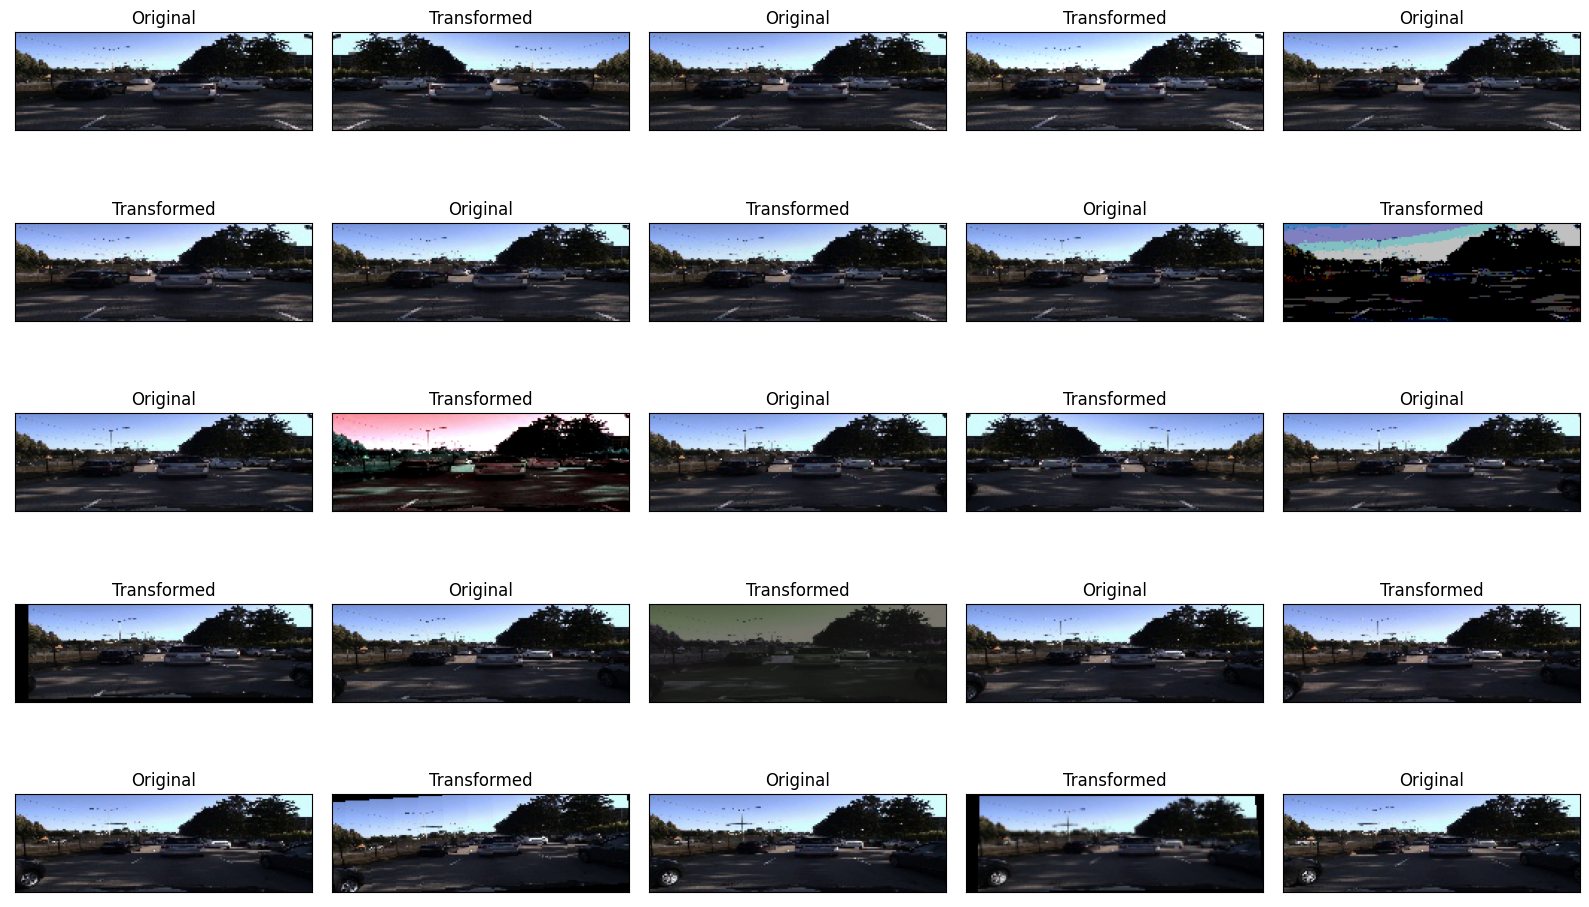

In [27]:
# Every next image may not be transformed
%matplotlib inline

sample_transformations=new_train_images[0:25]
    
fig, ax = plt.subplots(5,5, figsize=(16,10), dpi=100)
for i in range(5):
    for j in range(5):
        ind = i*5 + j
        ax[i][j].imshow(sample_transformations[ind]);
        ax[i][j].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
        if ind%2==0:
            ax[i][j].set_title("Original")
        else: 
            ax[i][j].set_title("Transformed")
fig.tight_layout()
plt.show()

In [28]:
new_train_images = np.moveaxis(new_train_images,-1,1)
print(new_train_images.shape) # Save as H x W x C
np.savez('./augmented_train_honda.npz',train_images= new_train_images, train_targets = new_train_labels )

(232737, 3, 66, 200)
